In [192]:
import pandas as pd


## importing the attack data (why attack data instead of normal data? because size was small to work with)


In [275]:
df=pd.read_csv('wadi_data/WADI_attackdata.csv') 

In [276]:
df['period'] = df[['Date','Time']].agg(' '.join, axis=1)
df['period'].head()

0    10/9/2017 6:00:00.000 PM
1    10/9/2017 6:00:01.000 PM
2    10/9/2017 6:00:02.000 PM
3    10/9/2017 6:00:03.000 PM
4    10/9/2017 6:00:04.000 PM
Name: period, dtype: object

In [277]:
df.drop(columns=['Date','Time'],inplace=True)

In [278]:
df.drop(columns='Row',inplace=True)


In [279]:
df.head()

,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_002_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_003_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_005_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_FIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_001_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_002_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_MV_001_STATUS,...,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_004_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\LEAK_DIFF_PRESSURE,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\PLANT_START_STOP_LOG,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\TOTAL_CONS_REQUIRED_FLOW,period
0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,10/9/2017 6:00:00.000 PM
1,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,10/9/2017 6:00:01.000 PM
2,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,10/9/2017 6:00:02.000 PM
3,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,10/9/2017 6:00:03.000 PM
4,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,10/9/2017 6:00:04.000 PM


In [280]:
df.period=pd.to_datetime(df.period)
df.period

0        2017-10-09 18:00:00
1        2017-10-09 18:00:01
2        2017-10-09 18:00:02
3        2017-10-09 18:00:03
4        2017-10-09 18:00:04
                 ...        
172796   2017-10-11 17:59:56
172797   2017-10-11 17:59:57
172798   2017-10-11 17:59:58
172799   2017-10-11 17:59:59
172800   2017-10-11 18:00:00
Name: period, Length: 172801, dtype: datetime64[ns]

## taking one sensor values at a time

In [281]:
from datetime import datetime
import numpy as np

In [282]:
df_temp=df
df_temp.head()



,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_002_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_003_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_005_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_FIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_001_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_002_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_MV_001_STATUS,...,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_004_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\LEAK_DIFF_PRESSURE,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\PLANT_START_STOP_LOG,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\TOTAL_CONS_REQUIRED_FLOW,period
0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,2017-10-09 18:00:00
1,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,2017-10-09 18:00:01
2,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,2017-10-09 18:00:02
3,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,2017-10-09 18:00:03
4,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,62.6226,1,0.39,2017-10-09 18:00:04


In [283]:
#setting time as index
df_temp.set_index('period',drop=True,inplace=True)


In [284]:
df_temp

,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_002_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_003_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_005_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_FIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_001_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_002_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_MV_001_STATUS,...,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_004_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\LEAK_DIFF_PRESSURE,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\PLANT_START_STOP_LOG,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\TOTAL_CONS_REQUIRED_FLOW
period,,,,,,,,,,,,,,,,,,,,,
2017-10-09 18:00:00,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
2017-10-09 18:00:01,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
2017-10-09 18:00:02,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
2017-10-09 18:00:03,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
2017-10-09 18:00:04,164.210,0.529486,11.9972,482.480,0.331167,0.001273,0,0,48.4820,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-11 17:59:56,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0,0,55.5587,1,...,1,1,1,1,1,1,1,59.3546,1,0.00
2017-10-11 17:59:57,172.959,0.547483,11.9184,466.034,0.318217,0.001222,0,0,55.5587,1,...,1,1,1,1,1,1,1,59.3546,1,0.00
2017-10-11 17:59:58,172.915,0.583479,11.9211,466.051,0.318317,0.001260,0,0,55.7260,1,...,1,1,1,1,1,1,1,58.8102,1,0.00


In [296]:
std_dev = df_temp.std(numeric_only=True)

In [299]:
lii=[i for i in std_dev.index if std_dev[i]>=1]
lii

<function list.count(value, /)>

In [301]:
df_temp=df_temp.loc[:,lii]
# df_temp.plot()
df_temp



,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_DPIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_FIC_101_CO,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_FIC_201_CO,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_FIC_301_CO,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_FIC_401_CO,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_FIC_501_CO,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_FIC_601_CO,...,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_PIC_003_CO,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_PIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_PIT_002_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2A_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2B_AIT_002_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2B_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_AIT_003_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_LT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\LEAK_DIFF_PRESSURE
period,,,,,,,,,,,,,,,,,,,,,
2017-10-09 18:00:00,164.210,482.480,48.4820,2538.70,35.6659,68.5648,100.0000,20.0701,100.0000,100.000,...,50.0,152.437,89.5817,473.890,8.96011,475.488,11.5280,-65.9686,64.3306,62.6226
2017-10-09 18:00:01,164.210,482.480,48.4820,2538.70,35.6659,68.5648,100.0000,20.0701,100.0000,100.000,...,50.0,152.437,89.5817,473.890,8.96011,475.488,11.5280,-65.9686,64.3306,62.6226
2017-10-09 18:00:02,164.210,482.480,48.4820,2538.70,35.6659,68.5648,100.0000,20.0701,100.0000,100.000,...,50.0,152.437,89.5817,473.890,8.96011,475.488,11.5280,-65.9686,64.3306,62.6226
2017-10-09 18:00:03,164.210,482.480,48.4820,2538.70,35.6659,68.5648,100.0000,20.0701,100.0000,100.000,...,50.0,152.437,89.5817,473.833,9.02457,475.394,11.5280,-65.9686,64.3306,62.6226
2017-10-09 18:00:04,164.210,482.480,48.4820,2538.70,35.6659,68.5648,100.0000,20.0701,100.0000,100.000,...,50.0,152.437,89.5817,473.833,9.02457,475.394,11.5280,-65.9686,64.3306,62.6226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-11 17:59:56,172.959,466.034,55.5587,2548.81,99.2489,100.0000,99.6468,100.0000,99.0896,99.648,...,50.0,150.465,91.1596,474.081,8098.91000,477.428,18.0929,-146.0400,67.1805,59.3546
2017-10-11 17:59:57,172.959,466.034,55.5587,2548.81,99.2489,100.0000,99.6468,100.0000,99.0896,99.648,...,50.0,150.465,91.1596,474.081,8098.91000,477.428,18.0929,-146.0400,67.1805,59.3546
2017-10-11 17:59:58,172.915,466.051,55.7260,2549.28,99.8062,100.0000,100.0000,100.0000,99.5522,100.000,...,50.0,150.634,91.4224,474.081,8098.91000,477.428,0.0000,1681.4100,67.1828,58.8102


In [303]:
idx=df_temp.loc['2017-10-09 18:00:00':'2017-10-10 18:00:00'].index
idx

DatetimeIndex(['2017-10-09 18:00:00', '2017-10-09 18:00:01',
               '2017-10-09 18:00:02', '2017-10-09 18:00:03',
               '2017-10-09 18:00:04', '2017-10-09 18:00:05',
               '2017-10-09 18:00:06', '2017-10-09 18:00:07',
               '2017-10-09 18:00:08', '2017-10-09 18:00:09',
               ...
               '2017-10-10 17:59:51', '2017-10-10 17:59:52',
               '2017-10-10 17:59:53', '2017-10-10 17:59:54',
               '2017-10-10 17:59:55', '2017-10-10 17:59:56',
               '2017-10-10 17:59:57', '2017-10-10 17:59:58',
               '2017-10-10 17:59:59', '2017-10-10 18:00:00'],
              dtype='datetime64[ns]', name='period', length=86401, freq=None)

In [312]:
most_var=df_temp.loc[idx][r'\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2B_AIT_002_PV']

In [313]:
most_var

period
2017-10-09 18:00:00       8.96011
2017-10-09 18:00:01       8.96011
2017-10-09 18:00:02       8.96011
2017-10-09 18:00:03       9.02457
2017-10-09 18:00:04       9.02457
                          ...    
2017-10-10 17:59:56    8108.57000
2017-10-10 17:59:57    8108.57000
2017-10-10 17:59:58    8108.57000
2017-10-10 17:59:59    8108.57000
2017-10-10 18:00:00    8108.57000
Name: \\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2B_AIT_002_PV, Length: 86401, dtype: float64

## these below are plots of the columns which has significant variance in values and not constant values in all the rows.

<AxesSubplot:xlabel='period'>

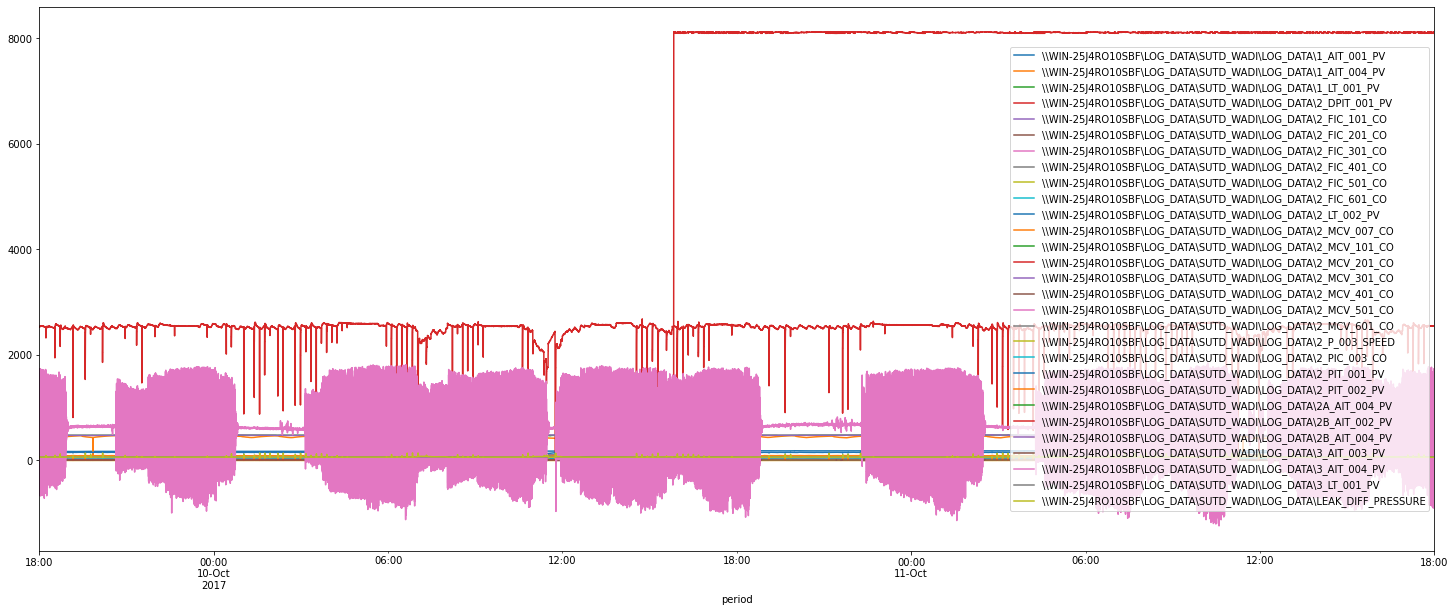

In [314]:
df_temp.plot(figsize=(25,10))

In [182]:
import matplotlib.pyplot as plt  
%matplotlib inline

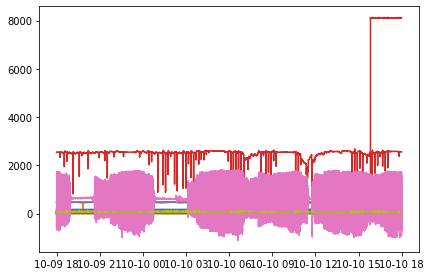

In [311]:
fig,axis= plt.subplots()
plt.tight_layout()
# axis.plot(idx,final)